## Enrichment analysis and GO plots 

It is crucial to understand the functional significance of the list of genes identified by high-throughput genomic methods. Enrichment analysis (or pathway analysis) can identify terms which are statistically over or under-represented within the list of interest, by systematically mapping genes and proteins to their associated biological annotations (such as gene ontology GO terms or pathway membership) and then comparing the distribution of the terms within a gene set of interest with the background distribution of these terms (eg all genes represented on a microarray chip). 

In this template the enrichment is performed using WebGestalt in R and the visualization is done with GOplot package.

In [1]:
suppressPackageStartupMessages(library(WebGestaltR))

**Results obtained in the meta analysis from expression data are explored here.**

In [2]:
# get the dataset to explore
meta.results<-read.table("/mnt/data/MetaAnalysis/output/meta_result_case-ctl")
head(meta.results,n=3)

,rank,logFC.case.ctl,Var,Qpvalue,REM.Pvalue,REM.FDR,Fisher.Pvalue,Fisher.FDR,n.estimators
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ZNF264,1,0.3552904,0.299334526,1.502152e-26,0.516086802,0.67039523,1.427335e-31,1.172413e-27,2
SVOP,2,-0.7902721,0.005249884,3.104079e-01,0.000000000,0.00000000,2.022028e-27,8.304468e-24,2
NFKB1,3,0.3817504,0.016106871,9.565457e-03,0.002629964,0.01517535,8.712374e-27,2.263827e-23,2


In [3]:
# WebGestalt categories to be explored
categories.database=c("geneontology_Biological_Process","geneontology_Cellular_Component","geneontology_Molecular_Function","pathway_KEGG","pathway_Wikipathway","pathway_Reactome","pathway_Panther")
categories.short=c("BP","CC","MF","KEGG","Wikipathway","Reactome","Panther")
categories.toplot=c("BP","CC","MF")

In [4]:
outpath="/mnt/data/Enrichment/output"
dir.create(outpath, recursive = TRUE)

In [5]:
?WebGestaltR

WebGestaltR {WebGestaltR},R Documentation
enrichMethod,"Enrichment methods: ORA, GSEA or NTA."
organism,"Currently, WebGestaltR supports 12 organisms. Users can use the function listOrganism to check available organisms. Users can also input others to perform the enrichment analysis for other organisms not supported by WebGestaltR. For other organisms, users need to provide the functional categories, interesting list and reference list (for ORA method). Because WebGestaltR does not perform the ID mapping for the other organisms, the above data should have the same ID type."
enrichDatabase,The functional categories for the enrichment analysis. Users can use the function listGeneSet to check the available functional databases for the selected organism. Multiple databases in a vector are supported for ORA and GSEA.
enrichDatabaseFile,"Users can provide one or more GMT files as the functional category for enrichment analysis. The extension of the file should be gmt and the first column of the file is the category ID, the second one is the external link for the category. Genes annotated to the category are from the third column. All columns are separated by tabs. The GMT files will be combined with enrichDatabase."
enrichDatabaseType,"The ID type of the genes in the enrichDatabaseFile. If users set organism as others, users do not need to set this ID type because WebGestaltR will not perform ID mapping for other organisms. The supported ID types of WebGestaltR for the selected organism can be found by the function listIdType."
enrichDatabaseDescriptionFile,Users can also provide description files for the custom enrichDatabaseFile. The extension of the description file should be des. The description file contains two columns: the first column is the category ID that should be exactly the same as the category ID in the custom enrichDatabaseFile and the second column is the description of the category. All columns are separated by tabs.
interestGeneFile,"If enrichMethod is ORA or NTA, the extension of the interestGeneFile should be txt and the file can only contain one column: the interesting gene list. If enrichMethod is GSEA, the extension of the interestGeneFile should be rnk and the file should contain two columns separated by tab: the gene list and the corresponding scores."
interestGene,"Users can also use an R object as the input. If enrichMethod is ORA or NTA, interestGene should be an R vector object containing the interesting gene list. If enrichMethod is GSEA, interestGene should be an R data.frame object containing two columns: the gene list and the corresponding scores."
interestGeneType,"The ID type of the interesting gene list. The supported ID types of WebGestaltR for the selected organism can be found by the function listIdType. If the organism is others, users do not need to set this parameter."
collapseMethod,"The method to collapse duplicate IDs with scores. mean, median, min and max represent the mean, median, minimum and maximum of scores for the duplicate IDs."


**Alter the parameters of WebGestaltR at your convenience**

The following code loops through all the categories and calls the WebGestaltR method to perform the analysis. The object 'result.cat' contains the result of the current category being queried and the object 'result' contains the concatenation of all categories.

In [6]:
DEGenes=rownames(meta.results[1:200 ,]) # top 200 genes
#DEGenes=rownames(meta.results[DEresult$padj<0.05 ,]) # Differentially Expressed genes, with adjusted p value > 0.05
#if (length(DEGenes) > 200) {DEGenes=DEGenes[1:200]}

# genedf.list will store genes and logFC for go plots
genedf.list=data.frame(ID=rownames(meta.results[DEGenes ,]),logFC=meta.results[DEGenes ,]$logFC.case.ctl)

result=data.frame() # dataframe that will contain all categories results from a DE analysis file
for (i in 1:length(categories.database)){ # for each category get the enrichment results
    cat("\n",categories.short[[i]],"\n") 
    result.cat=WebGestaltR(enrichMethod="ORA", organism="hsapiens",enrichDatabase=categories.database[[i]],enrichDatabaseFile=NULL, 
             enrichDatabaseType=NULL,enrichDatabaseDescriptionFile=NULL,interestGeneFile=NULL, 
             interestGene=DEGenes,interestGeneType="genesymbol",collapseMethod="mean",referenceGeneFile=NULL,
             referenceGene=NULL,referenceGeneType="genesymbol",referenceSet="genome", minNum=10, maxNum=500,
             fdrMethod="BH",sigMethod="fdr",fdrThr=0.20,topThr=10,reportNum=20,perNum=1000,
             isOutput=FALSE,outputDirectory=outpath,projectName=NULL,dagColor="binary",hostName="http://www.webgestalt.org/")
    cat(dim(result.cat))
    if(!is.null(dim(result.cat))){ # if there exists enrichment for this category
        result.cat=cbind(category = categories.short[[i]], result.cat) # add column with category at front
        result=rbind(result,result.cat)
    } 
}
filename="metaGWES_case_control"
write.table(result,paste(outpath,filename,sep="/"))


 BP 
Loading the functional categories...
Loading the ID list...
Loading the reference list...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
"No significant gene set is identified based on FDR 0.2!"



 CC 
Loading the functional categories...
Loading the ID list...
Loading the reference list...
Performing the enrichment analysis...
15 11
 MF 
Loading the functional categories...
Loading the ID list...
Loading the reference list...
Performing the enrichment analysis...
12 11
 KEGG 
Loading the functional categories...
Loading the ID list...
Loading the reference list...
Performing the enrichment analysis...
2 11
 Wikipathway 
Loading the functional categories...
Loading the ID list...
Loading the reference list...
Performing the enrichment analysis...
46 11
 Reactome 
Loading the functional categories...
Loading the ID list...
Loading the reference list...
Performing the enrichment analysis...
38 11
 Panther 
Loading the functional categories...
Loading the ID list...
Loading the reference list...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
"No significant gene set is identified based on FDR 0.2!"


In [7]:
result

category,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
CC,GO:0005743,mitochondrial inner membrane,http://amigo.geneontology.org/amigo/term/GO:0005743,455,12,3.15469425,3.803855,7.675239e-05,0.030318595,4711;4976;7385;10131;25875;29088;55744;55750;79590;84303;117145;285521,OPA1;MRPL24;LETMD1;CHCHD6;TRAP1;AGK;COA1;THEM4;MRPL15;COX18;NDUFB5;UQCRC2
CC,GO:1990391,DNA repair complex,http://amigo.geneontology.org/amigo/term/GO:1990391,40,4,0.27733576,14.422951,1.657331e-04,0.030318595,4437;51317;64421;126074,PHF21A;MSH3;SWSAP1;DCLRE1C
CC,GO:0031304,intrinsic component of mitochondrial inner membrane,http://amigo.geneontology.org/amigo/term/GO:0031304,40,4,0.27733576,14.422951,1.657331e-04,0.030318595,55744;55750;84303;285521,CHCHD6;AGK;COA1;COX18
CC,GO:0031305,integral component of mitochondrial inner membrane,http://amigo.geneontology.org/amigo/term/GO:0031305,40,4,0.27733576,14.422951,1.657331e-04,0.030318595,55744;55750;84303;285521,CHCHD6;AGK;COA1;COX18
CC,GO:0044455,mitochondrial membrane part,http://amigo.geneontology.org/amigo/term/GO:0044455,229,8,1.58774722,5.038585,1.963640e-04,0.030318595,4711;4976;7385;10651;55744;55750;84303;285521,OPA1;CHCHD6;AGK;COA1;MTX2;COX18;NDUFB5;UQCRC2
CC,GO:0033267,axon part,http://amigo.geneontology.org/amigo/term/GO:0033267,374,10,2.59308934,3.856404,2.785301e-04,0.035837533,1176;2596;3611;3786;4897;4976;5582;29993;54536;80228,OPA1;GAP43;EXOC6;NRCAM;ORAI2;AP3S1;PRKCG;PACSIN1;KCNQ3;ILK
CC,GO:0032592,integral component of mitochondrial membrane,http://amigo.geneontology.org/amigo/term/GO:0032592,69,4,0.47840418,8.361131,1.343200e-03,0.136745793,55744;55750;84303;285521,CHCHD6;AGK;COA1;COX18
CC,GO:0098573,intrinsic component of mitochondrial membrane,http://amigo.geneontology.org/amigo/term/GO:0098573,70,4,0.48533758,8.241686,1.417055e-03,0.136745793,55744;55750;84303;285521,CHCHD6;AGK;COA1;COX18
CC,GO:0005741,mitochondrial outer membrane,http://amigo.geneontology.org/amigo/term/GO:0005741,180,6,1.24801091,4.807650,1.599920e-03,0.137237570,4976;5521;10651;25875;55750;84816,OPA1;LETMD1;RTN4IP1;AGK;MTX2;PPP2R2B


### Plots

In [8]:
suppressPackageStartupMessages(library(GOplot))
suppressWarnings(suppressMessages(library(repr)))
options(repr.plot.width=10, repr.plot.height=10)

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Removed 10 rows containing missing values (geom_point)."


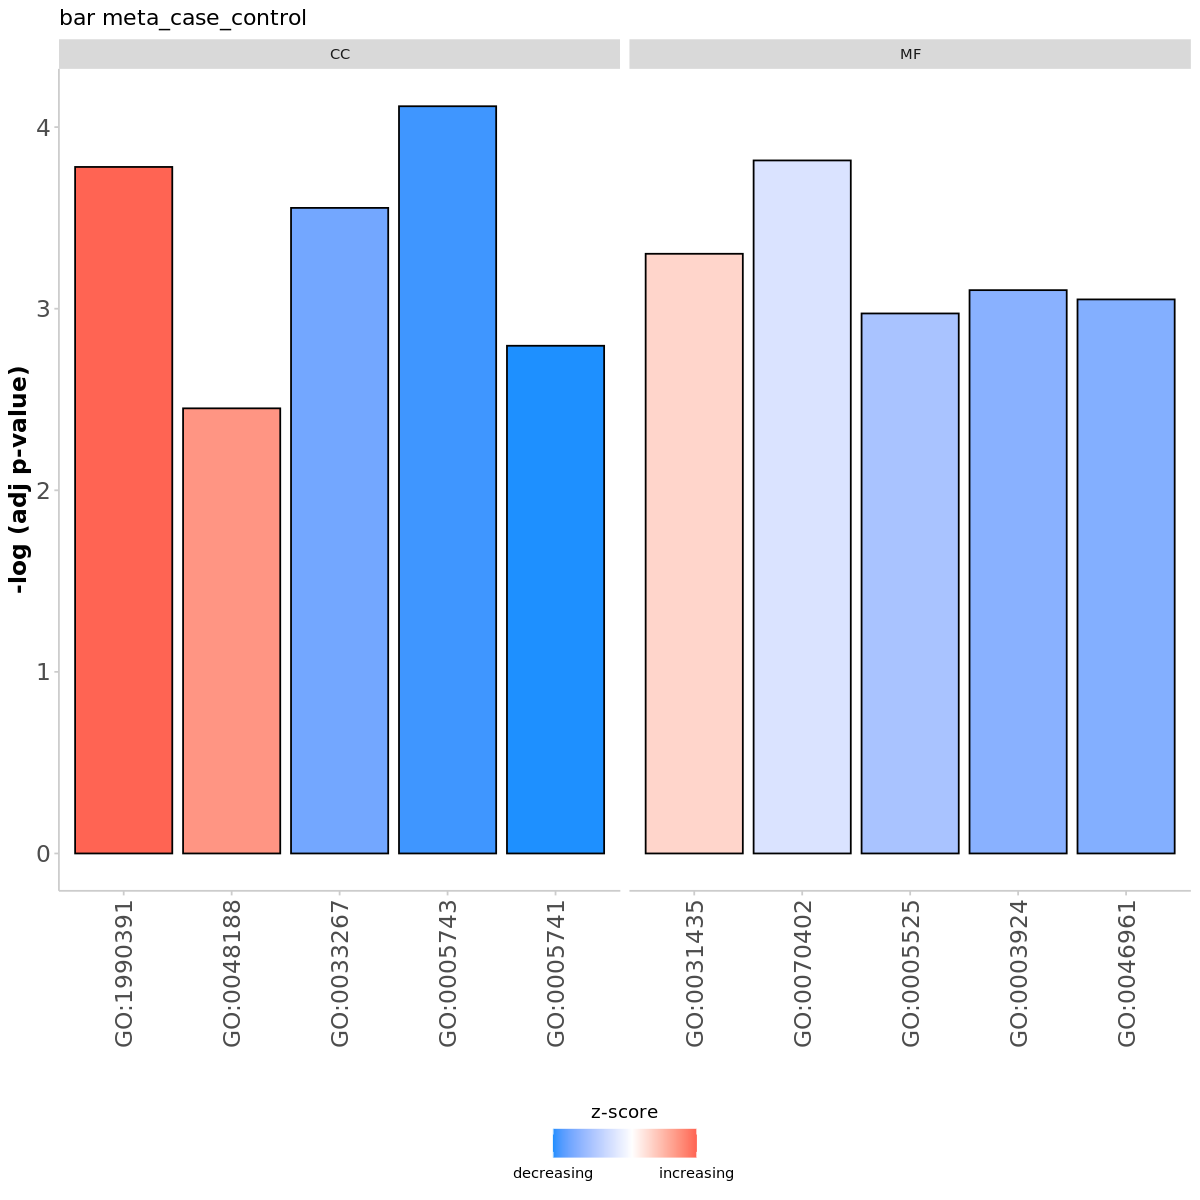

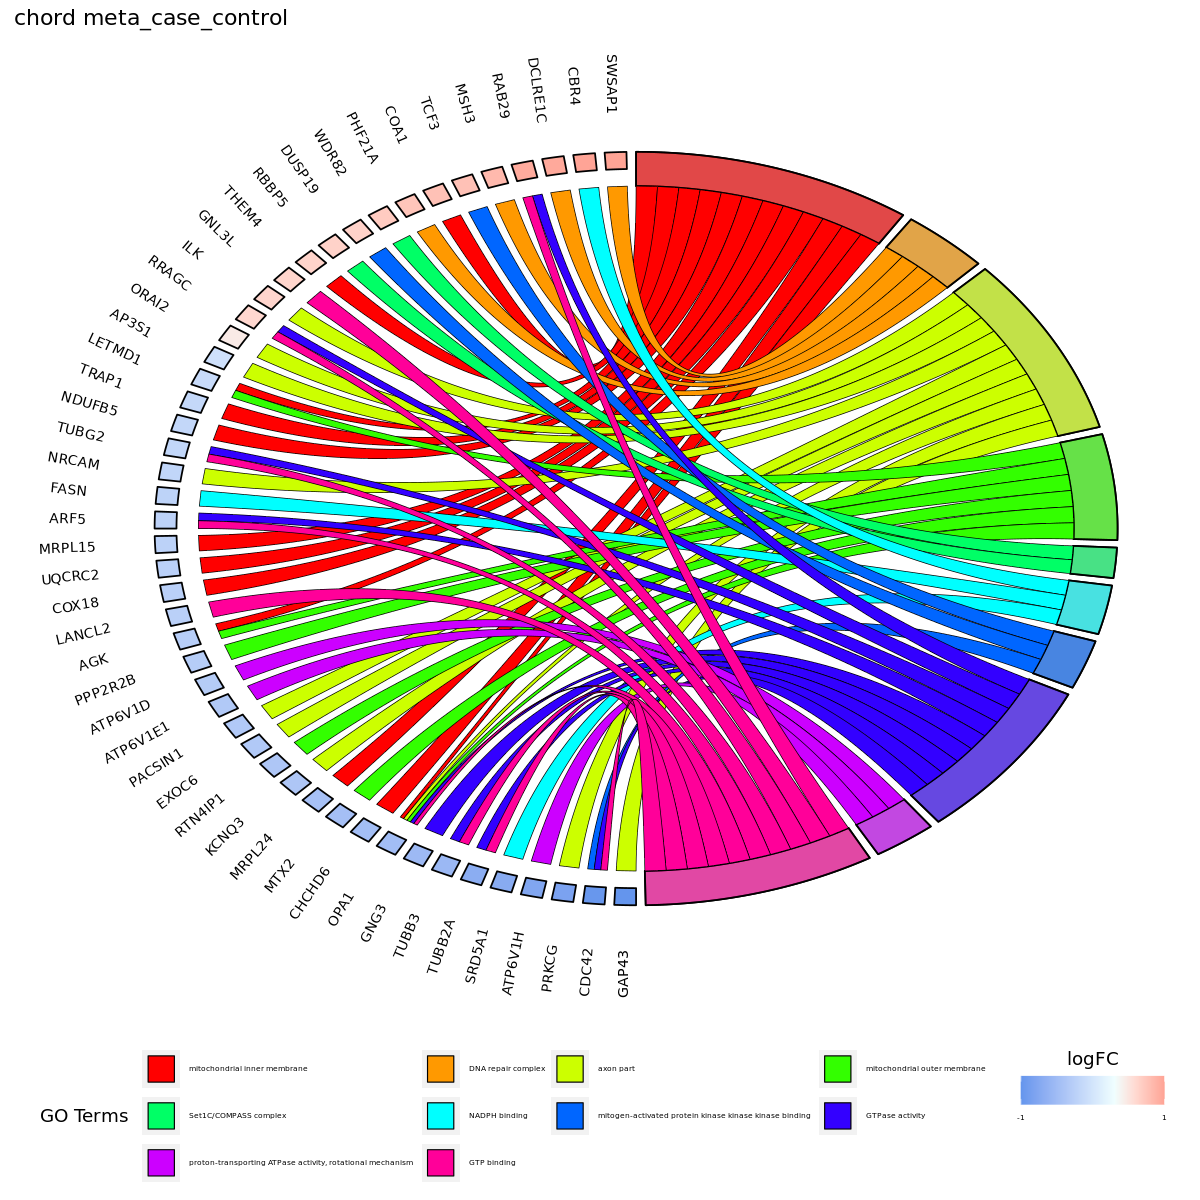

In [13]:
# prepare enrichment table to plot using the object result obtained in the last step
result.go=result[, c(1,2,3,9,12)]
result.go= result.go[result.go$category %in% categories.toplot ,]
names(result.go)=c("Category","ID","Term","adj_pval","Genes") 
result.go$Genes=gsub(';', ',', result.go$Genes)
#print(head(result.go,n=3))

# Generate the plotting object
circ <- circle_dat(result.go, genedf.list)
# Reduce redundant terms with a gene overlap >= 0.85...
reduced_circ <- reduce_overlap(circ, overlap = 0.85)
# dataframe with all genes in selected categories after reducing
reduced_circ_genes=circ[circ$term %in% reduced_circ$term ,]
filename="meta_case_control"
write.table(reduced_circ_genes,paste(outpath,paste(filename,"GOdataframe",sep="_"),sep="/"))

# bar plot
GOBar(reduced_circ_genes, display = 'multiple',title=paste("bar",filename)) 

# chord plot 
reduced_logfc=unique(reduced_circ_genes[, c(5,6)]) # extract genes and logFC from circ object
reduced_chord_genes <- chord_dat(reduced_circ_genes) # logFC column is missing
reduced_chord_genes.logfc=merge(reduced_chord_genes,reduced_logfc,by.x="row.names",by.y="genes")
reduced_chord_genes.logFC=reduced_chord_genes.logfc[ ,-c(1)]
rownames(reduced_chord_genes.logFC)= reduced_chord_genes.logfc[ ,1]

GOChord(reduced_chord_genes.logFC, space = 0.02, gene.order = 'logFC', gene.space = 0.30, gene.size = 3,process.label=4.5,border.size = 0.2,title=paste("chord",filename))



**Note:** the leyend in the GO chord plot has a very small font. Future work: find a suitable parameter to properly visualize the full leyend. Contact the package owner or try it yourself. Otherwsise, print the plot to pdf and zoom.

In [10]:
# to pdf
#pdf("goplot.pdf")
#GOBar(reduced_circ_genes, display = 'multiple',title=paste("bar",filename))
#GOChord(reduced_chord_genes.logFC, space = 0.02, gene.order = 'logFC', gene.space = 0.30, gene.size = 3,process.label=3.5,border.size = 0.2,title=paste("chord",filename))
#dev.off()

In [11]:
?GOChord

GOChord {GOplot},R Documentation
data,"The matrix represents the binary relation (1= is related to, 0= is not related to) between a set of genes (rows) and processes (columns); a column for the logFC of the genes is optional"
title,The title (on top) of the plot
space,The space between the chord segments of the plot
gene.order,A character vector defining the order of the displayed gene labels
gene.size,The size of the gene labels
gene.space,The space between the gene labels and the segement of the logFC
nlfc,Defines the number of logFC columns (default=1)
lfc.col,"The fill color for the logFC specified in the following form: c(color for low values, color for the mid point, color for the high values)"
lfc.min,Specifies the minimium value of the logFC scale (default = -3)
lfc.max,Specifies the maximum value of the logFC scale (default = 3)
